World Happiness Report
Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
World_Health_Report=pd.read_csv('World Happiness Report.csv')
World_Health_Report

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
World_Health_Report.head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
World_Health_Report.shape

(158, 12)

In [5]:
World_Health_Report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:

World_Health_Report.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
World_Health_Report.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
World_Health_Report.sort_values(by='Happiness Rank', ascending=True).head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
World_Health_Report.sort_values(by='Happiness Rank', ascending=False).head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [10]:
World_Health_Report_Region=World_Health_Report.groupby('Region')
World_Health_Report_Region['Happiness Score'].describe().sort_values(by='mean', ascending=True).head(20)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


Text(0.5, 1.0, 'Happiness Score of the top 20 Countries')

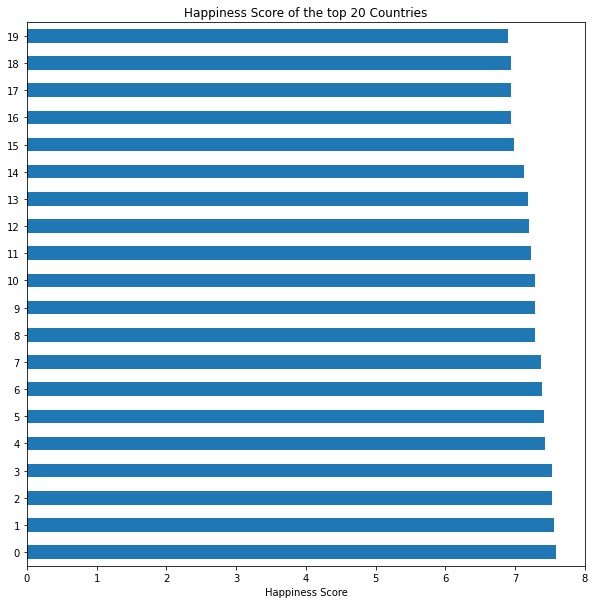

In [11]:
World_Health_Report['Happiness Score'].head(20).plot(xticks=np.arange(9), kind='barh', figsize=(10, 10))
plt.xlabel('Happiness Score')
plt.title('Happiness Score of the top 20 Countries')

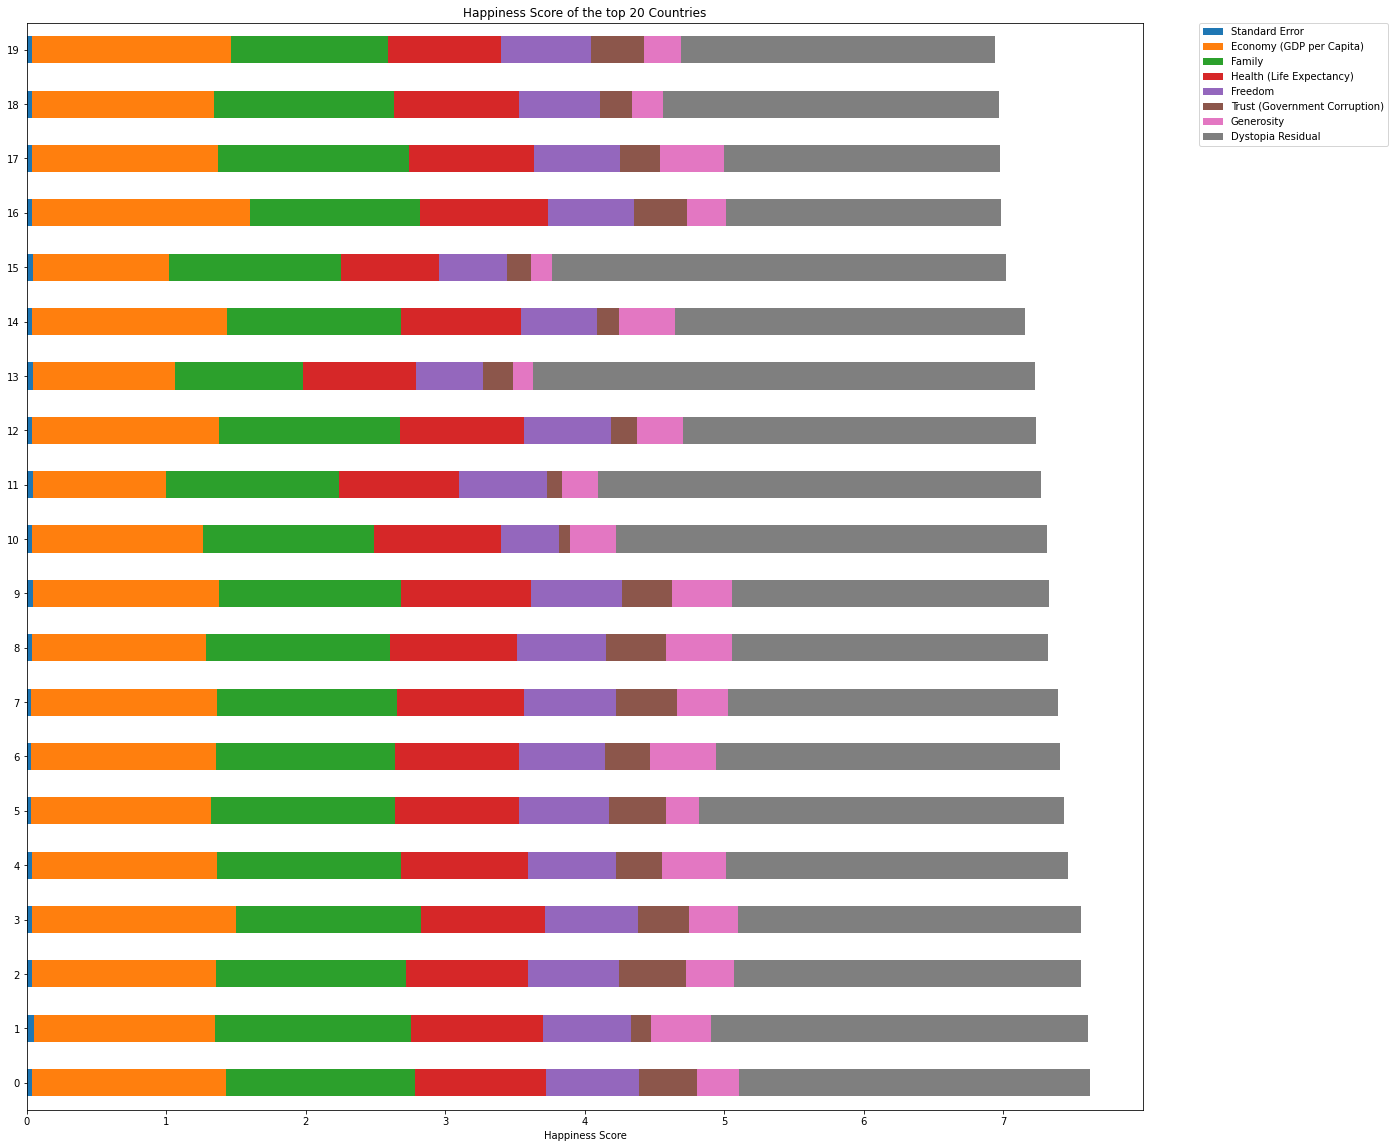

In [12]:
World_Health_Report[['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']].head(20).plot(kind='barh', xticks=np.arange(8), stacked=True, figsize= (20, 20))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 20 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Pairwise Scatter plot

C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


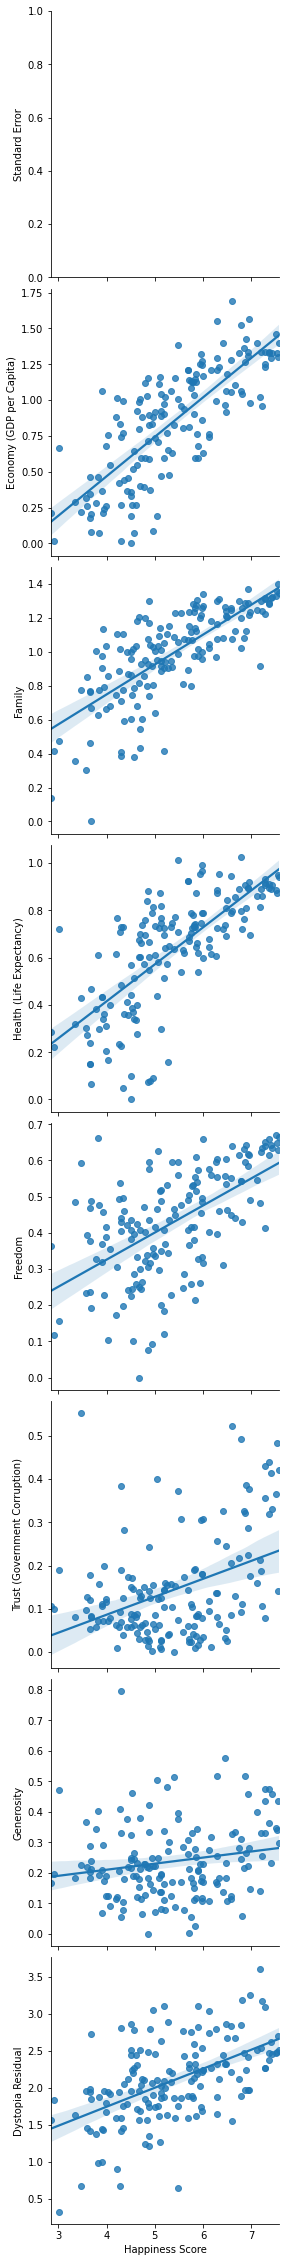

In [13]:
sns.pairplot(data=World_Health_Report, kind='reg', size=4,
                  x_vars=['Happiness Score'],
                  y_vars=['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


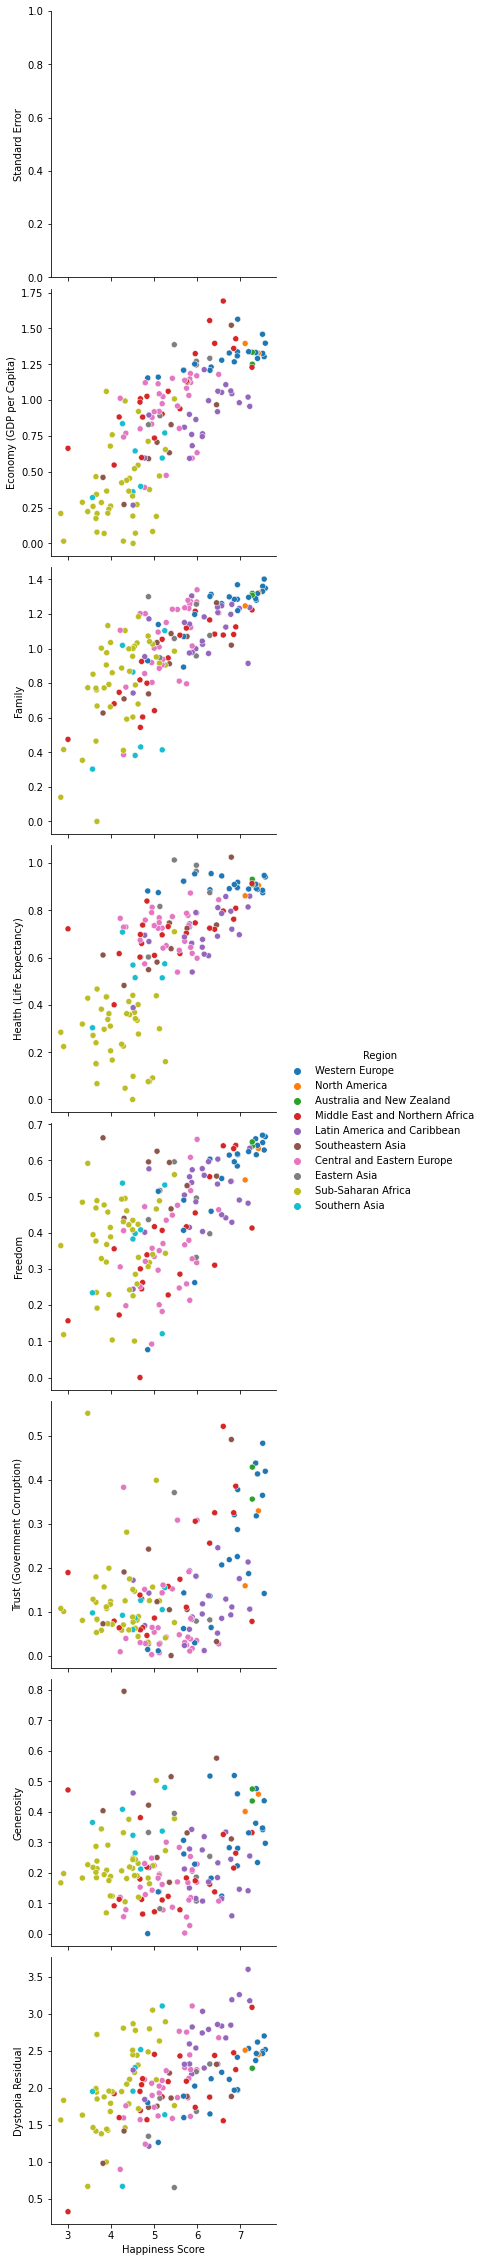

In [14]:
sns.pairplot(data=World_Health_Report, hue='Region', size=4,
                  x_vars=['Happiness Score'],
                  y_vars=['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])

Correlation 

In [15]:
World_Health_Report.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [16]:
World_Health_Report.corr(method="pearson", min_periods=20)["Happiness Score"].abs().sort_values(ascending=False)

Happiness Score                  1.000000
Happiness Rank                   0.992105
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                   0.177254
Name: Happiness Score, dtype: float64

In [17]:

World_Health_Report.corr(method="pearson", min_periods=20)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

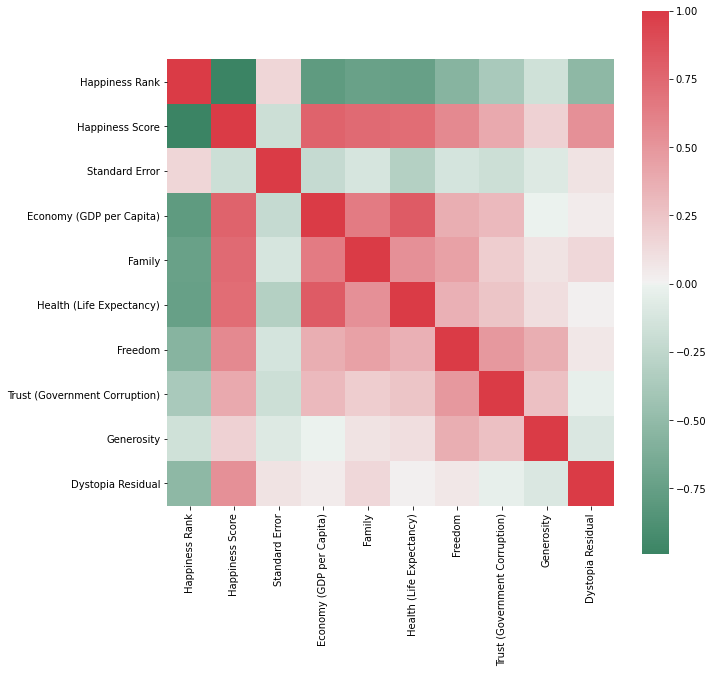

In [18]:

corr=World_Health_Report.corr(method = "pearson")
f, ax=plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(150, 10, as_cmap=True), square=True, ax=ax)

In [19]:
World_Health_Report[World_Health_Report['Happiness Score'] > 7].shape[0]

15

In [20]:
World_Health_Report[(World_Health_Report['Happiness Score'] > 7) & (World_Health_Report['Region'] == 'Western Europe')].shape[0]

8

In [21]:
float(len(World_Health_Report[(World_Health_Report['Happiness Score'] > 7) & (World_Health_Report['Region'] == 'Western Europe')]))/float(len(World_Health_Report[World_Health_Report['Happiness Score'] > 6]))

0.18181818181818182

In [22]:
print("The probability that a randomly selected country with happiness score over 7.0 is form Western Europe is {0:.0%}".format(float(World_Health_Report[(World_Health_Report['Happiness Score'] > 7) & (World_Health_Report['Region'] == 'Western Europe')].shape[0]
)/float(World_Health_Report[World_Health_Report['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 7.0 is form Western Europe is 18%


In [23]:
World_Health_Report.shape

(158, 12)

In [24]:
Sub_Saharan_Africa=[]
Southern_Asia=[]
Southeastern_Asia=[]
Central_Eastern_Europe=[]
Middle_East_Northern_Africa=[]
Eastern_Asia=[]
Latin_America_Caribbean=[]
Western_Europe=[]
North_America=[]
Australia_New_Zealand=[]

In [25]:
for x in World_Health_Report['Region']:
    if x == 'Sub_Saharan_Africa':
         Sub_Saharan_Africa.append(1)
    else: Sub_Saharan_Africa.append(0)

In [26]:
for x in World_Health_Report['Region']:
    if x == 'Southern_Asia':
         Southern_Asia.append(1)
    else: Southern_Asia.append(0)

In [27]:
for x in World_Health_Report['Region']:
    if x == 'Southeastern_Asia':
         Southeastern_Asia.append(1)
    else: Southeastern_Asia.append(0)

In [28]:
for x in World_Health_Report['Region']:
    if x == 'Central_Eastern_Europe':
         Central_Eastern_Europe.append(1)
    else: Central_Eastern_Europe.append(0)

In [29]:
for x in World_Health_Report['Region']:
    if x == 'Middle_East_Northern_Africa':
         Middle_East_Northern_Africa.append(1)
    else: Middle_East_Northern_Africa.append(0)

In [30]:
for x in World_Health_Report['Region']:
    if x == 'Eastern_Asia':
         Eastern_Asia.append(1)
    else: Eastern_Asia.append(0)

In [31]:
for x in World_Health_Report['Region']:
    if x == 'Latin_America_Caribbean':
         Latin_America_Caribbean.append(1)
    else: Latin_America_Caribbean.append(0)

In [32]:
for x in World_Health_Report['Region']:
    if x == 'Western_Europe':
         Western_Europe.append(1)
    else: Western_Europe.append(0)

In [33]:
for x in World_Health_Report['Region']:
    if x == 'North_America':
         North_America.append(1)
    else: North_America.append(0)

In [34]:
for x in World_Health_Report['Region']:
    if x == 'Australia_New_Zealand':
         Australia_New_Zealand.append(1)
    else: Australia_New_Zealand.append(0)

In [35]:
dt=pd.DataFrame(index=World_Health_Report.index)

In [36]:
dt['Sub-Saharan_Africa']=Sub_Saharan_Africa
dt['Southern Asia']=Southern_Asia
dt['Southeastern Asia']=Southeastern_Asia
dt['Central and Eastern Europe']=Central_Eastern_Europe
dt['Middle East and Northern Africa']=Middle_East_Northern_Africa
dt['Eastern Asia']=Eastern_Asia
dt['Latin America and Caribbean']=Latin_America_Caribbean
dt['Western Europe']=Western_Europe
dt['North America']=North_America
dt['Australia and New Zealand']=Australia_New_Zealand

In [37]:
dt.head(10)

,Sub-Saharan_Africa,Southern Asia,Southeastern Asia,Central and Eastern Europe,Middle East and Northern Africa,Eastern Asia,Latin America and Caribbean,Western Europe,North America,Australia and New Zealand
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
